# DI 6.3 - Geo Visual with Python

## This script contains the following
#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Data Cleaning
#### 4. Plotting a Chcoropleth

### 1. Importing Libraries and Data

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json
import geopandas as gpd
from shapely.geometry import Point

In [29]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [30]:
# Import data

GADS = pd.read_pickle(r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis\02 Data\Prepared Data\GADS_6.2PT1.pkl')

In [31]:
# Create Path

path = r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis'

In [32]:
path

'D:\\Career Foundry\\2) Data Immersion\\6) Advanced Analytics & Dashboard Design\\DI 6 - Jupyter Folder\\EMPRES Global Animal Disease Surveillance Analysis'

In [33]:
# Importing GeoJSON file (N. America, Europe, Asia, Africa) from https://geojson-maps.kyd.au/

GEO = gpd.read_file(r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis\02 Data\Original Data\custom.geo.json')

### 2. Data Wrangling

In [35]:
# Allowing for full few of all columns

pd.set_option('display.max_columns', 23)
GADS.head(30)

ID   Latitude  Longitude  Region             Country  \
0   230399 -27.900000  30.800000  Africa        South Africa   
1   230381  54.837037  73.354155  Europe  Russian Federation   
2   230333 -21.077740  30.211620  Africa            Zimbabwe   
3   230396 -26.000000  28.300000  Africa        South Africa   
4   230371  49.237900  17.700200  Europe      Czech Republic   
5   230370  49.237300  17.700800  Europe      Czech Republic   
6   230395 -26.000000  28.300000  Africa        South Africa   
7   230367  47.771608  33.993286  Europe             Ukraine   
8   230379  56.538381  16.119304  Europe              Sweden   
9   230394 -24.600000  27.200000  Africa        South Africa   
10  230380  55.456034  72.762834  Europe  Russian Federation   
11  230378  52.084460  23.080818  Europe              Poland   
12  230377  53.644444  22.605556  Europe              Poland   
13  230397 -26.800000  29.800000  Africa        South Africa   
14  230369  49.237300  17.699900  Europe      Czech Republic   
15  230368  32.143211  34.842794    Asia              Israel   
16  230334  46.780000   6.640000  Europe         Switzerland   
17  230332 -21.255660  31.524800  Africa            Zimbabwe   
18  230305  49.849592  26.435108  Europe             Ukraine   
19  230376  51.928458  22.712944  Europe              Poland   
20  230375  51.655215  23.268335  Europe              Poland   
21  230374  51.821846  23.552780  Europe              Poland   
22  230308  56.717530  24.329330  Europe              Latvia   
23  230306  48.361742  22.666549  Europe             Ukraine   
24  230289 -34.200000  20.700000  Africa        South Africa   
25  230288 -34.300000  20.800000  Africa        South Africa   
26  230383  53.703150  50.775044  Europe  Russian Federation   
27  230382  52.992708  49.562929  Europe  Russian Federation   
28  230373  51.961748  23.101870  Europe              Poland   
29  230307  56.405372  25.750728  Europe              Latvia   

      City/Providence            Locality LocalityQuality Observe Date  \
0       KwaZulu-Natal  HPAI_H5N8_2017_019           Exact   17/08/2017   
1      Omskaya Oblast      Novaya Stanica           Exact   16/08/2017   
2            Masvingo              Mwambe           Exact   16/08/2017   
3             Gauteng  HPAI_H5N8_2017_020           Exact   15/08/2017   
4        Jihomoravsky             Hvozdná           Exact   15/08/2017   
5        Jihomoravsky             Ostrata           Exact   15/08/2017   
6             Gauteng  HPAI_H5N8_2017_021           Exact   14/08/2017   
7    Dnipropetrovs'ka           Slovyanka           Exact   14/08/2017   
8         Kalmar Laen              Kalmar           Exact   13/08/2017   
9             Limpopo  HPAI_H5N8_2017_022           Exact    12/8/2017   
10     Omskaya Oblast         Tavrichanka           Exact    12/8/2017   
11          Lubeiskie            Terebela           Exact    12/8/2017   
12          Podlaskie        Pienczykowek           Exact    12/8/2017   
13         Mpumalanga  HPAI_H5N8_2017_018           Exact    11/8/2017   
14       Jihomoravsky             Hvozdná           Exact    11/8/2017   
15           Tel Aviv      Hakfar Hayarok           Exact    10/8/2017   
16               Vaud    Lac de Neuch tel           Exact    10/8/2017   
17           Masvingo         Chipfugwana           Exact    10/8/2017   
18      Khmel'nyts'ka             Korovye           Exact    10/8/2017   
19          Lubeiskie           Grabowiec           Exact     9/8/2017   
20          Lubeiskie               Mosty           Exact     9/8/2017   
21          Lubeiskie         Krzywowolka           Exact     9/8/2017   
22              Rigas    Baldones caounty           Exact     9/8/2017   
23       Zakarpats'ka    Nyzhniy Koropets           Exact     9/8/2017   
24       Western Cape  HPAI_H5N8_2017_015           Exact     9/8/2017   
25       Western Cape  HPAI_H5N8_2017_014           Exact     9/8/2017   
26  Samarskaya Oblast    

In [36]:
GADS.info()
GADS.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17008 non-null  int64  
 1   Latitude            17008 non-null  float64
 2   Longitude           17008 non-null  float64
 3   Region              17008 non-null  object 
 4   Country             17008 non-null  object 
 5   City/Providence     17008 non-null  object 
 6   Locality            17008 non-null  object 
 7   LocalityQuality     17008 non-null  object 
 8   Observe Date        17008 non-null  object 
 9   Report Date         17008 non-null  object 
 10  Status              17008 non-null  object 
 11  Disease             17008 non-null  object 
 12  Serotypes           17008 non-null  object 
 13  Sp. Description     17008 non-null  object 
 14  Sum Sp.AtRisk       17008 non-null  float64
 15  Sum Sp.Cases        17008 non-null  float64
 16  Sum 

(17008, 23)

In [37]:
GADS.describe()

ID      Latitude     Longitude  Sum Sp.AtRisk  \
count   17008.000000  17008.000000  17008.000000   1.700800e+04   
mean   218823.465075     39.168443     37.774981   4.302931e+03   
std      7048.338831     16.817821     41.034310   3.373946e+04   
min    206270.000000    -36.856210   -146.490000   0.000000e+00   
25%    212070.750000     32.090000     11.950000   0.000000e+00   
50%    219591.500000     43.821579     24.511700   3.000000e+00   
75%    224717.250000     48.102805     43.424390   1.300000e+02   
max    230399.000000     68.392000    144.847374   2.000000e+06   

        Sum Sp.Cases  Sum Sp.Deaths  Sum Sp.Destroyed  Sum Sp.Slaughtered  \
count   17008.000000   17008.000000      17008.000000        17008.000000   
mean      280.464487     165.929327       2879.526282           72.088841   
std      5383.268052    3751.408793      24846.023432         3682.319155   
min         0.000000       0.000000          0.000000            0.000000   
25%         1.000000       0.000000          0.000000            0.000000   
50%         1.000000       0.000000          0.000000            0.000000   
75%         3.000000       1.000000          1.000000            0.000000   
max    460000.000000  439799.000000     913590.000000       339006.000000   

        Humans Age  Humans Affected  Humans Deaths  
count  1068.000000      1417.000000     451.000000  
mean     17.701311         1.017643       0.889135  
std      26.932867         0.620142       0.321306  
min       0.000000         0.000000       0.000000  
25%       0.000000         1.000000       1.000000  
50%       0.000000         1.000000       1.000000  
75%      41.000000         1.000000       1.000000  
max      94.000000        24.000000       2.000000

In [38]:
GADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17008 non-null  int64  
 1   Latitude            17008 non-null  float64
 2   Longitude           17008 non-null  float64
 3   Region              17008 non-null  object 
 4   Country             17008 non-null  object 
 5   City/Providence     17008 non-null  object 
 6   Locality            17008 non-null  object 
 7   LocalityQuality     17008 non-null  object 
 8   Observe Date        17008 non-null  object 
 9   Report Date         17008 non-null  object 
 10  Status              17008 non-null  object 
 11  Disease             17008 non-null  object 
 12  Serotypes           17008 non-null  object 
 13  Sp. Description     17008 non-null  object 
 14  Sum Sp.AtRisk       17008 non-null  float64
 15  Sum Sp.Cases        17008 non-null  float64
 16  Sum 

In [39]:
GEO.shape

(155, 170)

In [40]:
pd.set_option('display.max_columns', 170)

In [41]:
GEO.head()

featurecla  scalerank  labelrank   sovereignt sov_a3  adm0_dif  level  \
0  Admin-0 country          1          2     Ethiopia    ETH         0      2   
1  Admin-0 country          1          3  South Sudan    SDS         0      2   
2  Admin-0 country          1          6      Somalia    SOM         0      2   
3  Admin-0 country          1          2        Kenya    KEN         0      2   
4  Admin-0 country          1          6       Malawi    MWI         0      2   

                type tlc        admin adm0_a3  geou_dif      geounit gu_a3  \
0  Sovereign country   1     Ethiopia     ETH         0     Ethiopia   ETH   
1  Sovereign country   1  South Sudan     SDS         0  South Sudan   SDS   
2  Sovereign country   1      Somalia     SOM         0      Somalia   SOM   
3  Sovereign country   1        Kenya     KEN         0        Kenya   KEN   
4  Sovereign country   1       Malawi     MWI         0       Malawi   MWI   

   su_dif      subunit su_a3  brk_diff      name    name_long brk_a3  \
0       0     Ethiopia   ETH         0  Ethiopia     Ethiopia    ETH   
1       0  South Sudan   SDS         0  S. Sudan  South Sudan    SDS   
2       0      Somalia   SOM         0   Somalia      Somalia    SOM   
3       0        Kenya   KEN         0     Kenya        Kenya    KEN   
4       0       Malawi   MWI         0    Malawi       Malawi    MWI   

   brk_name brk_group   abbrev postal  \
0  Ethiopia      None     Eth.     ET   
1  S. Sudan      None  S. Sud.     SS   
2   Somalia      None     Som.     SO   
3     Kenya      None     Ken.     KE   
4    Malawi      None     Mal.     MW   

                                 formal_en formal_fr   name_ciawf note_adm0  \
0  Federal Democratic Republic of Ethiopia      None     Ethiopia      None   
1                  Republic of South Sudan      None  South Sudan      None   
2              Federal Republic of Somalia      None      Somalia      None   
3                        Republic of Kenya      None        Kenya      None   
4                       Republic of Malawi      None       Malawi      None   

  note_brk    name_sort name_alt  mapcolor7  mapcolor8  mapcolor9  mapcolor13  \
0     None     Ethiopia     None          4          4          1          13   
1     None  South Sudan     None          1          3          3           5   
2     None      Somalia     None          2          8          6           7   
3     None        Kenya     None          5          2          7           3   
4     None       Malawi     None          1          3          4           5   

       pop_est  pop_rank  pop_year  gdp_md  gdp_year  \
0  112078730.0        17      2019   95912      2019   
1   11062113.0        14      2019   11998      2015   
2   10192317.3        14      2019    4719      2016   
3   52573973.0        16      2019   95503      2019   
4   18628747.0        14      2019    7666      2019   

                     economy     income_grp fips_10 iso_a2 iso_a2_eh iso_a3  \
0  7. Least developed region  5. Low income      ET     ET        ET    ETH   
1  7. Least developed region  5. Low income     -99     SS        SS    SSD   
2  7. Least developed region  5. Low income      SO     SO        SO    SOM   
3    5. Emerging region: G20  5. Low income      KE     KE        KE    KEN   
4  7. Least developed region  5. Low income      MI     MW        MW    MWI   

  iso_a3_eh iso_n3 iso_n3_eh un_a3 wb_a2 wb_a3    woe_id  woe_id_eh  \
0       ETH    231       231   231    ET   ETH  23424808   23424808   
1       SSD    728       728   728    SS   SSD       -99        -99   
2       SOM    706       706   706    SO   SOM       -90   23424949   
3       KEN    404       404   404    KE   KEN  23424863   23424863   
4       MWI    454       454   454    MW   MWI  23424889   23424889   

                                            woe_note adm0_iso adm0_diff  \
0                         Exact WOE match as country      ETH      None   
1  Includes states of

In [42]:
GEO['continent'].unique() # We want to find a common between the DataFrame and the JSON file so that they can be used to create the choropleth map

array(['Africa', 'North America', 'Europe', 'Asia'], dtype=object)

In [43]:
GADS['Region'].unique()

array(['Africa', 'Europe', 'Asia', 'Americas'], dtype=object)

In [44]:
# Replacing a variable in the Region coloumn to match the JSON file

GADS['Region'] = GADS['Region'].replace('Americas', 'North America')

In [45]:
# Checking the replace worked

GADS['Region'].unique()

array(['Africa', 'Europe', 'Asia', 'North America'], dtype=object)

### 3. Data Cleaning

#### Missing Values

In [48]:
GADS.isnull().sum()

ID                        0
Latitude                  0
Longitude                 0
Region                    0
Country                   0
City/Providence           0
Locality                  0
LocalityQuality           0
Observe Date              0
Report Date               0
Status                    0
Disease                   0
Serotypes                 0
Sp. Description           0
Sum Sp.AtRisk             0
Sum Sp.Cases              0
Sum Sp.Deaths             0
Sum Sp.Destroyed          0
Sum Sp.Slaughtered        0
Humans Gender             0
Humans Age            15940
Humans Affected       15591
Humans Deaths         16557
dtype: int64

In [49]:
GADS[['Humans Age', 'Humans Affected', 'Humans Deaths']].fillna(-0)

Humans Age  Humans Affected  Humans Deaths
0             0.0              0.0            0.0
1             0.0              0.0            0.0
2             0.0              0.0            0.0
3             0.0              0.0            0.0
4             0.0              0.0            0.0
...           ...              ...            ...
17003         0.0              0.0            0.0
17004         0.0              0.0            0.0
17005         0.0              0.0            0.0
17006         0.0              0.0            0.0
17007         0.0              0.0            0.0

[17008 rows x 3 columns]

In [50]:
# Checking that our fillna code worked

print("--- After fillna(-0) ---")
print(GADS[['Humans Age', 'Humans Affected', 'Humans Deaths']].head())
print(GADS[['Humans Age', 'Humans Affected', 'Humans Deaths']].isnull().sum())

--- After fillna(-0) ---
   Humans Age  Humans Affected  Humans Deaths
0         0.0              NaN            NaN
1         NaN              NaN            NaN
2         NaN              NaN            NaN
3         0.0              NaN            NaN
4         NaN              NaN            NaN
Humans Age         15940
Humans Affected    15591
Humans Deaths      16557
dtype: int64


In [51]:
# The previous fillna code did not worked, so we take a different approach 

for col in ['Humans Age', 'Humans Affected', 'Humans Deaths']:
    GADS[col] = GADS[col].fillna(-0).astype(float)

In [52]:
print(GADS[['Humans Age', 'Humans Affected', 'Humans Deaths']].isnull().sum())

Humans Age         0
Humans Affected    0
Humans Deaths      0
dtype: int64


In [53]:
# There is success with the second code used

In [54]:
# Checking that all missing values are filled

GADS.isnull().sum()

ID                    0
Latitude              0
Longitude             0
Region                0
Country               0
City/Providence       0
Locality              0
LocalityQuality       0
Observe Date          0
Report Date           0
Status                0
Disease               0
Serotypes             0
Sp. Description       0
Sum Sp.AtRisk         0
Sum Sp.Cases          0
Sum Sp.Deaths         0
Sum Sp.Destroyed      0
Sum Sp.Slaughtered    0
Humans Gender         0
Humans Age            0
Humans Affected       0
Humans Deaths         0
dtype: int64

#### Duplicates

In [56]:
dups = GADS.duplicated()

In [57]:
dups.shape

(17008,)

In [58]:
# No duplicated found

#### Extreme Values Check

In [60]:
GADS.describe()

ID      Latitude     Longitude  Sum Sp.AtRisk  \
count   17008.000000  17008.000000  17008.000000   1.700800e+04   
mean   218823.465075     39.168443     37.774981   4.302931e+03   
std      7048.338831     16.817821     41.034310   3.373946e+04   
min    206270.000000    -36.856210   -146.490000   0.000000e+00   
25%    212070.750000     32.090000     11.950000   0.000000e+00   
50%    219591.500000     43.821579     24.511700   3.000000e+00   
75%    224717.250000     48.102805     43.424390   1.300000e+02   
max    230399.000000     68.392000    144.847374   2.000000e+06   

        Sum Sp.Cases  Sum Sp.Deaths  Sum Sp.Destroyed  Sum Sp.Slaughtered  \
count   17008.000000   17008.000000      17008.000000        17008.000000   
mean      280.464487     165.929327       2879.526282           72.088841   
std      5383.268052    3751.408793      24846.023432         3682.319155   
min         0.000000       0.000000          0.000000            0.000000   
25%         1.000000       0.000000          0.000000            0.000000   
50%         1.000000       0.000000          0.000000            0.000000   
75%         3.000000       1.000000          1.000000            0.000000   
max    460000.000000  439799.000000     913590.000000       339006.000000   

         Humans Age  Humans Affected  Humans Deaths  
count  17008.000000     17008.000000   17008.000000  
mean       1.111536         0.084784       0.023577  
std        7.996918         0.333340       0.152119  
min        0.000000         0.000000       0.000000  
25%        0.000000         0.000000       0.000000  
50%        0.000000         0.000000       0.000000  
75%        0.000000         0.000000       0.000000  
max       94.000000        24.000000       2.000000

##### Sum Sp.AtRisk

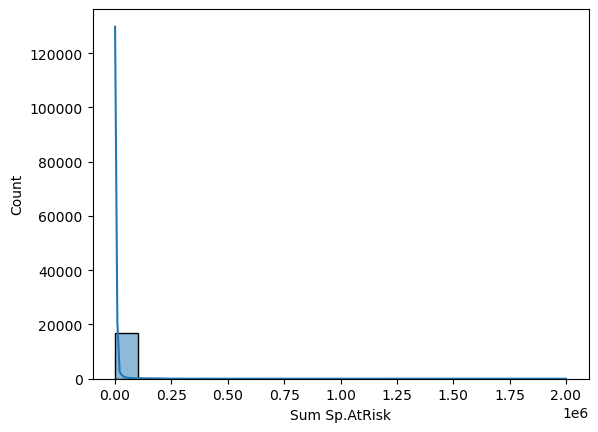

In [62]:
sns.histplot(GADS['Sum Sp.AtRisk'], bins=20, kde = True) # shows extreme values for 'Sum Sp.AtRisk'
plt.show()

In [63]:
# Check how many extreme values

GADS[GADS['Sum Sp.AtRisk'] >150000]

ID   Latitude   Longitude         Region       Country  \
0      230399 -27.900000   30.800000         Africa  South Africa   
32     230290 -25.800000   29.600000         Africa  South Africa   
55     230184 -26.800000   29.300000         Africa  South Africa   
102    230274  15.037942  120.765382           Asia   Philippines   
135    230189  45.363724   10.525470         Europe         Italy   
...       ...        ...         ...            ...           ...   
13676  211759  21.525593 -102.241538  North America        Mexico   
13709  211096  21.363383 -101.928880  North America        Mexico   
14060  209692   8.737600    7.255700         Africa       Nigeria   
14400  211885  37.104100   43.830800           Asia          Iraq   
16687  206617  23.002440 -105.867527  North America        Mexico   

                  City/Providence                    Locality LocalityQuality  \
0                   KwaZulu-Natal          HPAI_H5N8_2017_019           Exact   
32                     Mpumalanga          HPAI_H5N8_2017_016           Exact   
55                     Mpumalanga          HPAI_H5N8_2017_011           Exact   
102    Region III (Central Luzon)                    San Luis           Exact   
135                     Lombardia  Castiglione delle Stiviere           Exact   
...                           ...                         ...             ...   
13676                     Jalisco         Encarnación de Diaz           Exact   
13709                     Jalisco             Lagos de Moreno           Exact   
14060                       Abuja                        Kuje           Exact   
14400                       Dahuk                       Sumel           Exact   
16687                     Sinaloa                  El Rosario           Exact   

      Observe Date Report Date     Status            Disease  Serotypes  \
0       17/08/2017  22/08/2017  Confirmed  Influenza - Avian  H5N8 HPAI   
32        7/8/2017   11/8/2017  Confirmed  Influenza - Avian  H5N8 HPAI   
55        1/8/2017    3/8/2017  Confirmed  Influenza - Avian  H5N8 HPAI   
102     24/07/2017   11/8/2017  Confirmed  Influenza - Avian    H5 HPAI   
135     20/07/2017  28/07/2017  Confirmed  Influenza - Avian  H5N8 HPAI   
...            ...         ...        ...                ...        ...   
13676   28/01/2016    8/4/2016  Confirmed  Influenza - Avian  H7N3 HPAI   
13709   26/01/2016    3/3/2016  Confirmed  Influenza - Avian  H7N3 HPAI   
14060     8/1/2016  13/01/2016  Confirmed  Influenza - Avian  H5N1 HPAI   
14400   16/12/2015  25/04/2016  Confirmed  Influenza - Avian  H5N1 HPAI   
16687   24/07/2015  14/08/2015  Confirmed  Influenza - Avian  H5N2 LPAI   

                  Sp. Description  Sum Sp.AtRisk  Sum Sp.Cases  Sum Sp.Deaths  \
0      domestic, unspecified bird       248000.0          12.0           12.0   
32     domestic, unspecified bird       326764.0         975.0          975.0   
55     domestic, unspecified bird       398723.0         301.0          301.0   
102    domestic, unspecified bird       190000.0       36485.0        36485.0   
135             domestic, chicken       460000.0      460000.0         5000.0   
...                           ...            ...           ...            ...   
13676  domestic, unspecified bird       414231.0          15.0            0.0   
13709           domestic, chicken       413086.0          15.0            0.0   
14060           domestic, chicken       180000.0       18000.0        18000.0   
14400  domestic, unspecified bird       685975.0       64500.0        64500.0   
16687           domestic, chicken       433093.0           0.0            0.0   

       Sum Sp.Destroyed  Sum Sp.Slaughtered Humans Gender  Humans Age  \
0               50000.0                 0.0           nan         0.0   
32             325789.0                 0.0           nan         0.0   
55                  0.0                 0.0           nan         0.0   
102                 0.0                 0.0

##### Extreme values not removed because looking at the data most of the species at risk are domesticated livestock. There is a possibility of there being large numbers of domesticated animals for consumption that are at risk of disease

##### Sum Sp.Cases

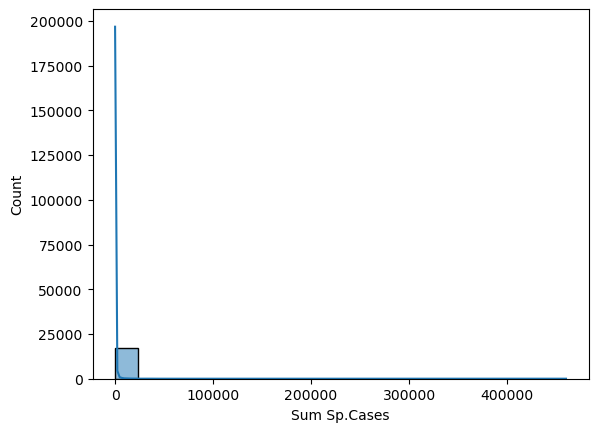

In [66]:
sns.histplot(GADS['Sum Sp.Cases'], bins=20, kde = True) # shows extreme values for 'Sum Sp.Cases'
plt.show()

In [67]:
# Check how many extreme values

GADS[GADS['Sum Sp.Cases'] > 20000]

ID   Latitude   Longitude  Region                      Country  \
38     230283  45.346753   10.530068  Europe                        Italy   
39     230282  45.333108   10.522951  Europe                        Italy   
51     230292  43.370000  122.150000    Asia                        China   
65     230173  43.622500  122.255833    Asia                        China   
80     230186  45.161023   10.637780  Europe                        Italy   
102    230274  15.037942  120.765382    Asia                  Philippines   
135    230189  45.363724   10.525470  Europe                        Italy   
429    228786 -26.800000   28.800000  Africa                 South Africa   
527    228490  46.333333  132.200000    Asia                        China   
740    228316  40.818700  111.725600    Asia                        China   
835    227989  38.390549  109.722441    Asia                        China   
1350   226258  44.420900   11.799384  Europe                        Italy   
1718   226043  29.091970   31.074450  Africa                        Egypt   
1786   225424  26.389000  111.311000    Asia                        China   
2121   225927   5.523460   10.622769  Africa                     Cameroon   
4135   223490  37.127990   49.309060    Asia  Iran  (Islamic Republic of)   
4691   221459  37.578971   22.411220  Europe                       Greece   
4886   221167  41.775780   25.905070  Europe                     Bulgaria   
4887   221166  42.232700   24.793680  Europe                     Bulgaria   
4948   227017  37.172413  126.855175    Asia            Republic of Korea   
6426   220908  34.856400   50.855500    Asia  Iran  (Islamic Republic of)   
6740   220102  35.668560   50.795440    Asia  Iran  (Islamic Republic of)   
7103   219475  55.995309   13.441772  Europe                       Sweden   
7511   219309  35.607560   50.695400    Asia  Iran  (Islamic Republic of)   
9239   217534  38.310000  102.110000    Asia                        China   
10753  217357   5.354455   -4.258067  Africa                Côte d'Ivoire   
11485  214846  33.018880   44.784530    Asia                         Iraq   
11859  214842  33.145600   44.670500    Asia                         Iraq   
12260  212612  30.771506   31.102173  Africa                        Egypt   
12748  211611  30.733576   31.689895  Africa                        Egypt   
13252  212914  13.526200    2.061400  Africa                        Niger   
13641  210976  32.542269   35.264879    Asia                       Israel   
14373  209472   6.321333    7.508680  Africa                      Nigeria   
14400  211885  37.104100   43.830800    Asia                         Iraq   
16540  206611  32.430000  119.570000    Asia                        China   
16724  206777   5.686376   -3.194947  Africa                Côte d'Ivoire   

                    City/Providence                             Locality  \
38                        Lombardia                               Medole   
39                        Lombardia                               Medole   
51               Nei Mongol Zizhiqu                             Khorchin   
65               Nei Mongol Zizhiqu       Horqin district, Tongliao city   
80                        Lombardia                        Castellucchio   
102      Region III (Central Luzon)                             San Luis   
135                       Lombardia           Castiglione delle Stiviere   
429                      Mpumalanga       HPAI_H5N8_2017_002, Dipaleseng   
527              Heilongjiang Sheng                      Baoqing County    
740              Nei Mongol Zizhiqu                          Hohhot City   
835                   Shaanxi Sheng   Xiejiawan Village, Yuyang District   
1350                 Emilia-romagna                              Mordano   
1718                      Beni Suef                          Arab Marekt   
1786                    Hunan Sheng                     Yongzhou, Dongan   
2121                 

##### Extreme values not removed. When comparing the sum of cases reported to the sum of species at risk many values line up. This indicates that there is a strong correlation between the cases of aniamls that are presenting with a disease compared to the number of animals at risk. 

##### Sum Sp.Deaths

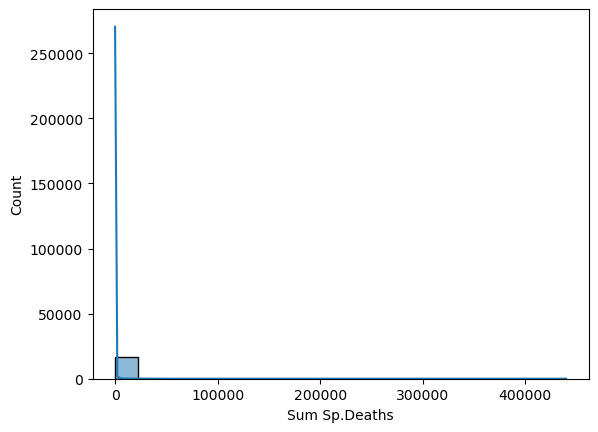

In [70]:
sns.histplot(GADS['Sum Sp.Deaths'], bins=20, kde = True) # shows extreme values for 'Sum Sp.Deaths'
plt.show()

In [71]:
# Check how many extreme values

GADS[GADS['Sum Sp.Deaths'] >20000]

ID   Latitude   Longitude  Region            Country  \
102    230274  15.037942  120.765382    Asia        Philippines   
429    228786 -26.800000   28.800000  Africa       South Africa   
740    228316  40.818700  111.725600    Asia              China   
835    227989  38.390549  109.722441    Asia              China   
2121   225927   5.523460   10.622769  Africa           Cameroon   
4948   227017  37.172413  126.855175    Asia  Republic of Korea   
6055   222028  31.325220   34.587520    Asia             Israel   
6056   222027  31.676256   34.637934    Asia             Israel   
10753  217357   5.354455   -4.258067  Africa      Côte d'Ivoire   
11485  214846  33.018880   44.784530    Asia               Iraq   
11859  214842  33.145600   44.670500    Asia               Iraq   
12901  211833  32.398618   34.931056    Asia             Israel   
13252  212914  13.526200    2.061400  Africa              Niger   
14373  209472   6.321333    7.508680  Africa            Nigeria   
14400  211885  37.104100   43.830800    Asia               Iraq   
16121  207022  47.393362   26.175542  Europe            Romania   
16724  206777   5.686376   -3.194947  Africa      Côte d'Ivoire   

                    City/Providence                            Locality  \
102      Region III (Central Luzon)                            San Luis   
429                      Mpumalanga      HPAI_H5N8_2017_002, Dipaleseng   
740              Nei Mongol Zizhiqu                         Hohhot City   
835                   Shaanxi Sheng  Xiejiawan Village, Yuyang District   
2121                          Ouest                            Mbandjou   
4948                     Kyonggi-do                         Hwaseong-si   
6055              Southern District                              MASLUL   
6056              Southern District                             HODIYYA   
10753  District autonome de Abidjan        Yopougon (Songon Agba Attié)   
11485                        Wassit                          Alsewara 1   
11859                       Baghdad                             AlWahda   
12901              Central District         GIV''''''''AT HAYYIM (IHUD)   
13252                        Niamey              Poultry centre, Niamey   
14373                         Enugu                          Nkanu West   
14400                         Dahuk                               Sumel   
16121                       Suceava                             Suceava   
16724                         Comoe            Bassam, Modeste, Aboisso   

       LocalityQuality Observe Date Report Date     Status            Disease  \
102              Exact   24/07/2017   11/8/2017  Confirmed  Influenza - Avian   
429              Exact   20/06/2017  26/06/2017  Confirmed  Influenza - Avian   
740              Exact   31/05/2017    8/6/2017  Confirmed  Influenza - Avian   
835            Unknown   21/05/2017  29/05/2017  Confirmed  Influenza - Avian   
2121           Unknown     7/3/2017    4/4/2017  Confirmed  Influenza - Avian   
4948             Exact     1/1/2017  14/04/2017  Confirmed  Influenza - Avian   
6055           Unknown   10/12/2016  18/01/2017  Confirmed  Newcastle disease   
6056           Unknown   10/12/2016  18/01/2017  Confirmed  Newcastle disease   
10753            Exact   27/07/2016   3/10/2016  Confirmed  Influenza - Avian   
11485            Exact   29/06/2016  25/07/2016  Confirmed  Influenza - Avian   
11859            Exact   15/06/2016  25/07/2016  Confirmed  Influenza - Avian   
12901            Exact    11/3/2016  17/04/2016  Confirmed  Newcastle disease   
13252            Exact   21/02/2016    2/6/2016  Confirmed  Influenza - Avian   
14373  Centroid Admin2   18/12/2015    5/1/2016  Confirmed  Influenza - Avian   
14400            Exact   16/12/2015  25/04/2016  Confirmed  Influenza - Avian   
16121            Exact   25/08/2015    9/9/2015  Confirmed  Newcastle disease   
16724  Centroid Admin2   17/07/2015  25/08/2015  Confirmed  Influenza - Avia

##### Extreme values not removed. When observing the sum of species deathed compared to the cases reported and the sum of speces at risk, the sum of species deaths either matches the cases reported or are under the sum of species at risk. The sum of cases reported and the sum of deaths can be less than or equal to indicating the the animals that developed a disease die from that disease. Furthermore, species deaths that are less than or equal to the sum of species at risk indicate that there are not more animal deaths than what the sum of the species at risk is calculated at.

##### Sum Sp.Destroyed

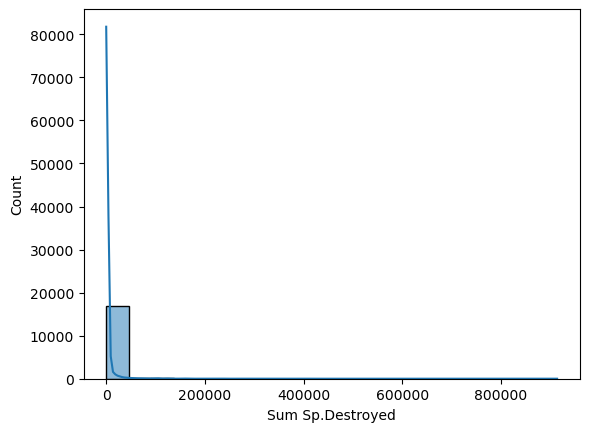

In [74]:
sns.histplot(GADS['Sum Sp.Destroyed'], bins=20, kde = True) # shows extreme values for 'Sum Sp.Destroyed'
plt.show()

In [75]:
# Check how many extreme values

GADS[GADS['Sum Sp.Destroyed'] >20000]

ID   Latitude   Longitude  Region                     Country  \
0      230399 -27.900000   30.800000  Africa                South Africa   
32     230290 -25.800000   29.600000  Africa                South Africa   
51     230292  43.370000  122.150000    Asia                       China   
65     230173  43.622500  122.255833    Asia                       China   
184    230146  14.077525   98.196364    Asia                     Myanmar   
...       ...        ...         ...     ...                         ...   
16868  211057  22.551710  120.486810    Asia  Taiwan (Province of China)   
16871  227193  23.933140  120.411420    Asia  Taiwan (Province of China)   
16872  211056  23.411689  120.271506    Asia  Taiwan (Province of China)   
16886  208781  23.475240  120.220321    Asia  Taiwan (Province of China)   
16887  208780  22.760500  120.505620    Asia  Taiwan (Province of China)   

          City/Providence                        Locality    LocalityQuality  \
0           KwaZulu-Natal              HPAI_H5N8_2017_019              Exact   
32             Mpumalanga              HPAI_H5N8_2017_016              Exact   
51     Nei Mongol Zizhiqu                        Khorchin              Exact   
65     Nei Mongol Zizhiqu  Horqin district, Tongliao city  Centroid Locality   
184            Taninthayi              We kyun htein thit              Exact   
...                   ...                             ...                ...   
16868        Taiwan Sheng                 Wandan Township              Exact   
16871        Taiwan Sheng                  Erlin Township            Unknown   
16872        Taiwan Sheng                  Lucao Township              Exact   
16886        Taiwan Sheng                Dongshi Township            Unknown   
16887        Taiwan Sheng                  Jiuru Township            Unknown   

      Observe Date Report Date     Status            Disease  Serotypes  \
0       17/08/2017  22/08/2017  Confirmed  Influenza - Avian  H5N8 HPAI   
32        7/8/2017   11/8/2017  Confirmed  Influenza - Avian  H5N8 HPAI   
51        1/8/2017    4/8/2017  Confirmed  Influenza - Avian  H5N1 HPAI   
65      28/07/2017    1/8/2017  Confirmed  Influenza - Avian  H5N1 HPAI   
184     16/07/2017  25/07/2017  Confirmed  Influenza - Avian  H5N1 HPAI   
...            ...         ...        ...                ...        ...   
16868   22/02/2015    3/3/2016  Confirmed  Influenza - Avian  H5N2 LPAI   
16871   20/02/2015    1/5/2017  Confirmed  Influenza - Avian  H5N2 LPAI   
16872   15/02/2015    3/3/2016  Confirmed  Influenza - Avian  H5N2 LPAI   
16886   21/01/2015  23/11/2015  Confirmed  Influenza - Avian  H5N2 LPAI   
16887   20/01/2015  23/11/2015  Confirmed  Influenza - Avian  H5N2 LPAI   

                  Sp. Description  Sum Sp.AtRisk  Sum Sp.Cases  Sum Sp.Deaths  \
0      domestic, unspecified bird       248000.0          12.0           12.0   
32     domestic, unspecified bird       326764.0         975.0          975.0   
51     domestic, unspecified bird        81500.0       35000.0        15000.0   
65              domestic, chicken            0.0       35000.0        15000.0   
184             domestic, chicken        25555.0        5440.0         5440.0   
...                           ...            ...           ...            ...   
16868           domestic, chicken        25000.0           0.0         3809.0   
16871           domestic, chicken        32520.0           0.0          400.0   
16872           domestic, chicken       113090.0           0.0         8411.0   
16886  domestic, unspecified bird        29700.0           0.0         2000.0   
16887  domestic, unspecified bird        30881.0           0.0          900.0   

       Sum Sp.Destroyed  Sum Sp.Slaughtered Humans Gender  Humans Age  \
0               50000.0                 0.0           nan         0.0   
32             325789.0                 0.0           nan         0.0   
51              66500.0                 0.0 

##### Extreme values not removed. Again, there is great evidence that the species destroyed are less than or equal to the sum of species at risk. The destroyed column indicates that some form of human involvment for species death is probably. Many diseases that livestock animals develope can be harmful to other livestock and thus they must be eradicated to prevent the spread. If the sum of species destroyed is less than or equal to either species at risk, cases reported, or species that died, this proves that proper documentation of these animals (especially livestock/domesticated animals) is being recorded.

### 4. Plotting a Chcoropleth

In [78]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = GADS[['Sum Sp.AtRisk', 'Region']]
data_to_plot.head()

Sum Sp.AtRisk  Region
0       248000.0  Africa
1          122.0  Europe
2         1283.0  Africa
3            0.0  Africa
4            0.0  Europe

In [183]:
# Setup a folium map at a high-level zoom

map = folium.Map(location=[49, -95], zoom_start=4)

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = GEO,  # Use the loaded Python object GEO here
    name = 'Global Animal Disease Risk',
    data = data_to_plot,
    columns = ['Region','Sum Sp.AtRisk'],
    key_on = 'feature.properties.name_en',
    fill_color = 'YlOrRd',
    fill_opacity = 0.6,
    line_opacity = 0.1,
    legend_name = "Sum of Species at Risk"
).add_to(map)
folium.LayerControl().add_to(map)

map

In [184]:
# Lets take a more detailed look into our Sum Sp.AtRisk columns becausee our values aren't being represented very well by color.

print(GADS['Sum Sp.AtRisk'].min())
print(GADS['Sum Sp.AtRisk'].max())
print(GADS['Sum Sp.AtRisk'].describe())

0.0
2000000.0
count    1.700800e+04
mean     4.302931e+03
std      3.373946e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      1.300000e+02
max      2.000000e+06
Name: Sum Sp.AtRisk, dtype: float64


In [185]:
# Create the data frame with just the states and the values for rating we want plotted again

data_to_plot = GADS[['Sum Sp.AtRisk', 'Region']]
data_to_plot.head()

Sum Sp.AtRisk  Region
0       248000.0  Africa
1          122.0  Europe
2         1283.0  Africa
3            0.0  Africa
4            0.0  Europe

In [186]:
# Our map didn't quite work. let's try something different

map = folium.Map(location=[49, -95], zoom_start=4)
bins = [0, 1, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 2000000] # Create specific bins to show that our Sum Sp.AtRisk values are taken into account

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = GEO,  # Use the loaded Python object GEO here
    name = 'Global Animal Disease Risk',
    data = data_to_plot,
    columns = ['Region','Sum Sp.AtRisk'],
    key_on = 'feature.properties.continent',
    fill_color = 'YlOrRd',
    fill_opacity = 0.6,
    line_opacity = 0.1,
    legend_name = "Sum of Species at Risk",
    bins=bins,
).add_to(map)
folium.LayerControl().add_to(map)

map

In [122]:
# We're getting closer to a good choropleth map but now our legend is not a good representation.
# I turn to Gemini AI to help establish a more advanced approach without using folium.colormap as my folium version isn't up to date as of 4/2025

from matplotlib.colors import LinearSegmentedColormap
# Create custom bins
bins = [0, 1, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 2000000]
num_colors = len(bins) - 1

# Create a custom colormap using matplotlib
cmap = LinearSegmentedColormap.from_list("mycmap", ["yellow", "orange", "red"], N=num_colors)
hex_colors = [matplotlib.colors.to_hex(c) for c in cmap(np.linspace(0, 1, num_colors))]

# Create the map
map = folium.Map(location=[49, -95], zoom_start=4)

# Function to determine color based on value and bins
def get_color(value):
    for i in range(num_colors):
        if bins[i] <= value < bins[i+1]:
            return hex_colors[i]
    if value >= bins[-1]:
        return hex_colors[-1]
    return 'white'  # Default color for NaN or values outside bins

# Add GeoJson layer with custom style function
folium.GeoJson(
    GEO.to_json(),
    name='Global Animal Disease Risk',
    style_function=lambda feature: {
        'fillColor': get_color(data_to_plot[data_to_plot['Region'] == feature['properties']['continent']]['Sum Sp.AtRisk'].iloc[0] if not data_to_plot[data_to_plot['Region'] == feature['properties']['continent']]['Sum Sp.AtRisk'].empty else np.nan),
        'color': 'black',
        'weight': 0.2,
        'fillOpacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(fields=['continent'], aliases=['Continent:'])
).add_to(map)

# Add a custom legend (outside of Choropleth)
legend_html = '<div style="position: fixed; bottom: 50px; left: 50px; width: 180px; height: auto; z-index:1000; background-color: white; border:2px solid grey; border-radius:5px; padding:10px; font-size:14px;">'
legend_html += '<p style="font-size:16px; margin-bottom:5px;">' + "Sum of Species at Risk" + '</p>'
for i in range(num_colors):
    legend_html += '<div style="display: flex; flex-direction: row; align-items: center;">'
    legend_html += f'<div style="width: 20px; height: 20px; background-color:{hex_colors[i]}; margin-right: 10px;"></div>'
    legend_html += f'<div>{bins[i]:,.0f} - {bins[i+1]:,.0f}</div>'  # Format numbers
    legend_html += '</div><br>'
legend_html += f'<div style="display: flex; flex-direction: row; align-items: center;"><div style="width: 20px; height: 20px; background-color:{hex_colors[-1]}; margin-right: 10px;"></div><div>> {bins[-2]:,.0f}</div></div><br>' # Add the last bin range
legend_html += '</div>'
map.get_root().html.add_child(folium.Element(legend_html))

# Add Layer Control
folium.LayerControl().add_to(map)

# Display the map
map

In [188]:
map.save('Choropleth Map 6.3.html')

##### Exporting (pickle)

In [236]:
GADS.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'GADS_6.3.pkl'))